In [87]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append("../")

### Import Desired Tires

In [88]:
all_tires = {
    "Hoosier_18x6.0-10_LCO_6_cornering":{"long":None, "lat":None},
    "Hoosier_18x6.0-10_LCO_7_cornering":{"long":None, "lat":None},
    "Hoosier_18x6.0-10_R20_6_cornering":{"long":None, "lat":None},
    "Hoosier_18x6.0-10_R20_7_cornering":{"long":None, "lat":None},
}

### Filter Data

In [89]:
camber = 0 # default camber
pressure = 12 * 6.89476 # default pressure
velocity = 25 * 1.60934 # default velocity
slip_angle = 0
tire_scaling = 2/3

tire_dict = all_tires.items()

for name, tire in tire_dict:
    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["long"] = df[(df["pressure"] == pressure) & (df["velocity"] == velocity) & (df["camber"] == camber) & (df["slip"] == slip_angle)]
    except:
        print("Error getting long data for {0}".format(name))

    try:
        df = pd.read_csv(f"../processing/results/{name}.csv")
        tire["lat"] = df[((df["velocity"] == velocity) & (df["pressure"] == pressure) & (df["camber"] == camber))]
    except:
        print("Error getting lateral data for {0}".format(name))

### Extract Max Aligning Moments and Respective Slip Angles

In [90]:
tire_name = []
normal_loads = []
aligning_moments = []
slip_angles = []

for name, tire in all_tires.items():
    current_normal_loads = np.array(tire["lat"]["load"].unique())
    current_aligning_moment = []
    current_normal_load = []
    current_slip_angles = []
    for load in current_normal_loads:
        if load > -300:
            continue
        temp = tire["lat"][tire["lat"]["load"] == load][(tire["lat"]["SA"] < 10) & (tire["lat"]["SA"] > -10)]
        # max_MZ = max(temp["MZ"])
        min_MZ = min(temp["MZ"])
        # max_MZ_mag = max(abs(max_MZ), abs(min_MZ))
        # if max_MZ_mag not in temp["MZ"]:
        #     max_MZ_mag *= -1
        
        SA_at_MZ = temp[temp["MZ"] == min_MZ]["SA"].tolist()[0]

        current_slip_angles.append(abs(SA_at_MZ))
        current_aligning_moment.append(abs(min_MZ))
        current_normal_load.append(load)

    slip_angles.append(current_slip_angles)
    normal_loads.append(current_normal_load)
    aligning_moments.append(current_aligning_moment)
    tire_name.append(name[:23])

/tmp/ipykernel_17219/2680472452.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp = tire["lat"][tire["lat"]["load"] == load][(tire["lat"]["SA"] < 10) & (tire["lat"]["SA"] > -10)]


### Plot Peak MZ vs FZ

Text(0, 0.5, 'MZ (Nm)')

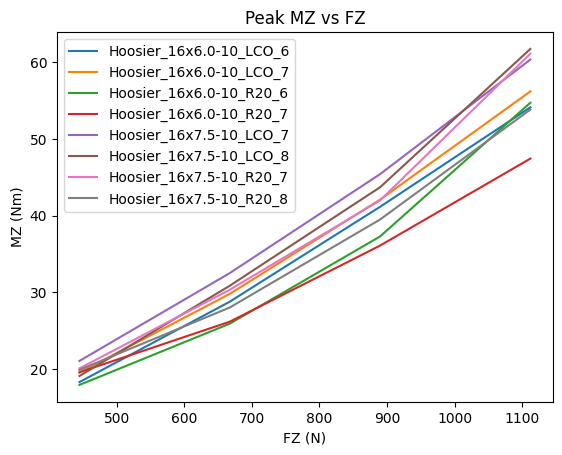

In [91]:
for i in range(len(tire_name)):
    plt.plot(-1 * np.array(normal_loads[i]), aligning_moments[i])

plt.legend(tire_name)
plt.title("Peak MZ vs FZ")
plt.xlabel("FZ (N)")
plt.ylabel("MZ (Nm)")

### Plot SA at Peak MZ vs FZ

Text(0, 0.5, 'SA at Peak MZ (deg)')

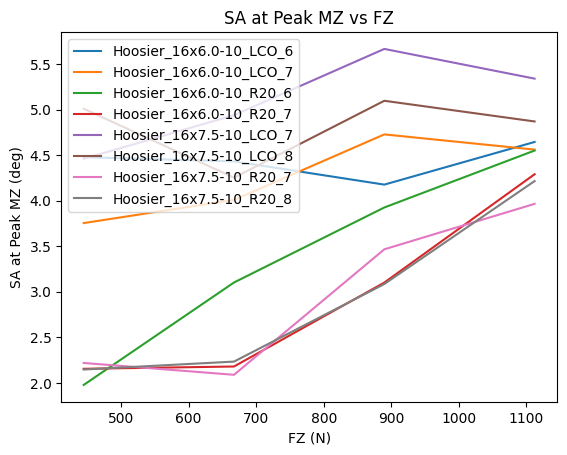

In [95]:
for i in range(len(tire_name)):
    plt.plot(-1 * np.array(normal_loads[i]), slip_angles[i])

plt.legend(tire_name, loc = 'upper left')
plt.title("SA at Peak MZ vs FZ")
plt.xlabel("FZ (N)")
plt.ylabel("SA at Peak MZ (deg)")